In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout,Activation
import pandas as pd
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:

img_width, img_height = 224, 224

In [3]:
train_data_dir = 'chest-xray-pneumonia/chest_xray/train'
validation_data_dir = 'chest-xray-pneumonia/chest_xray/val'
nb_train_samples = 40
nb_validation_samples = 10
batch_size = 4

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3, 3),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3, 3),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),  activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.compile(loss='binary_crossentropy', # or categorical_crossentropy
              optimizer='adam',# or adagrad
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

In [8]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

print(train_generator.class_indices)

Found 5216 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


In [10]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 16 images belonging to 2 classes.


In [11]:
import scipy.ndimage
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples ,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples )




Epoch 1/10





40/40 [==============================] - 10s 260ms/step - loss: 2.1089 - acc: 0.7812 - val_loss: 0.7761 - val_acc: 0.5500
Epoch 2/10
40/40 [==============================] - 10s 238ms/step - loss: 0.6511 - acc: 0.7188 - val_loss: 0.7932 - val_acc: 0.4500
Epoch 3/10
40/40 [==============================] - 12s 302ms/step - loss: 0.6373 - acc: 0.7000 - val_loss: 0.7681 - val_acc: 0.5000
Epoch 4/10
40/40 [==============================] - 11s 267ms/step - loss: 0.6181 - acc: 0.7125 - val_loss: 0.7297 - val_acc: 0.5000
Epoch 5/10
40/40 [==============================] - 10s 258ms/step - loss: 0.6219 - acc: 0.7000 - val_loss: 0.6898 - val_acc: 0.5000
Epoch 6/10
40/40 [==============================] - 11s 264ms/step - loss: 0.5508 - acc: 0.7750 - val_loss: 0.8431 - val_acc: 0.5000
Epoch 7/10
40/40 [==============================] - 10s 243ms/step - loss: 0.5206 - acc: 0.7812 - val_loss: 0.8028 - val_acc: 0.4750
Epoch 8/10
40/40 [==============================] - 10s 256ms

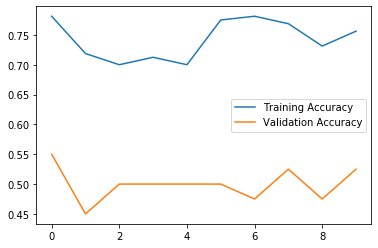

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.legend()


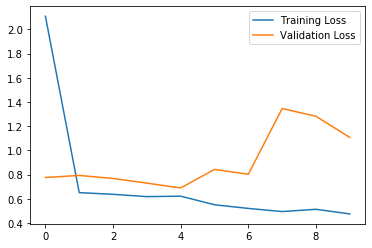

In [13]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.legend()